# Load dataset

In [1]:
from sklearn.datasets import load_digits

data = load_digits(as_frame=True)

In [2]:
df = data.frame

In [3]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [4]:
X = data.data
y = data.target

In [5]:
X.shape

(1797, 64)

In [6]:
y.shape

(1797,)

# Visualization

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def visualize(x,label):
  matrix = np.array(x).reshape(8, 8)
  plt.imshow(matrix, cmap='gray')
  plt.title(f'Label: {label}')
  plt.show()

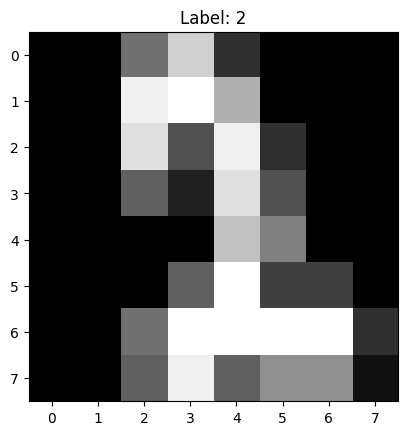

In [8]:
import random

rand = random.randint(0,int(len(X)))
x = X.iloc[rand]
label = y.iloc[rand]

visualize(x,label)

# PCA

In [25]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

PCA()

In [26]:
comp = pca.components_

In [27]:
comp.shape

(64, 64)

In [28]:
evr = pca.explained_variance_ratio_

In [29]:
evr.shape

(64,)

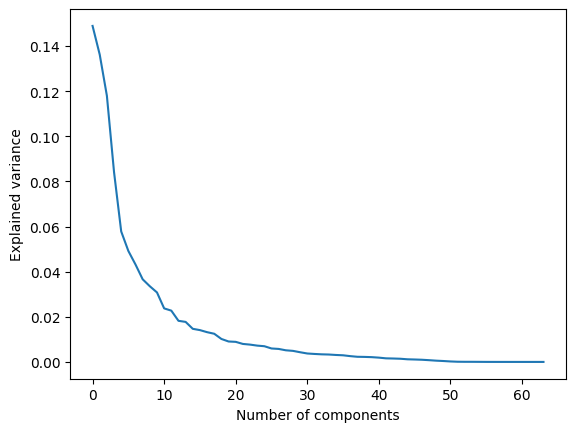

In [30]:
plt.plot(evr)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

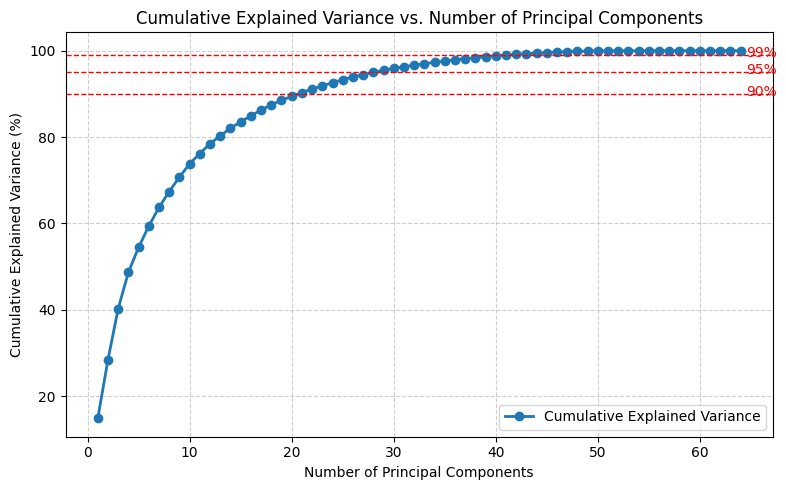

 برای حفظ 95٪ از واریانس داده‌ها، به 29 مؤلفه اصلی نیاز داریم.


In [31]:
cumulative_variance = np.cumsum(pca.explained_variance_ratio_) * 100

plt.figure(figsize=(8,5))
plt.plot(range(1, 65), cumulative_variance, marker='o', linewidth=2, label='Cumulative Explained Variance')

for threshold in [90, 95, 99]:
    plt.axhline(y=threshold, color='r', linestyle='--', linewidth=1)
    plt.text(64.5, threshold+0.5, f'{threshold}%', color='r', va='center')

plt.title("Cumulative Explained Variance vs. Number of Principal Components")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

n_components_95 = np.argmax(cumulative_variance >= 95) + 1
print(f" برای حفظ 95٪ از واریانس داده‌ها، به {n_components_95} مؤلفه اصلی نیاز داریم.")


In [40]:
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X)

In [41]:
X_pca_2d

array([[ -1.25946645, -21.27488348],
       [  7.9576113 ,  20.76869896],
       [  6.99192297,   9.95598641],
       ...,
       [ 10.8012837 ,   6.96025223],
       [ -4.87210009, -12.42395362],
       [ -0.34438963,  -6.36554919]])

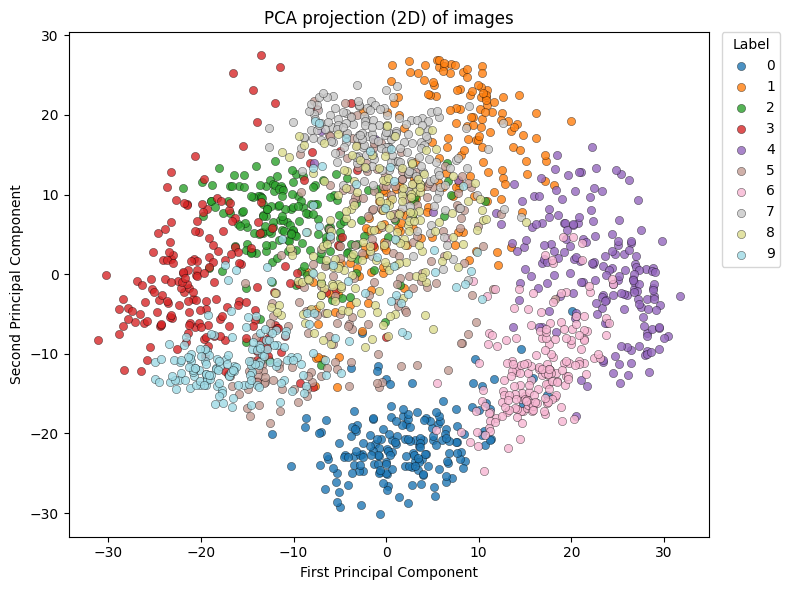

In [48]:
import matplotlib.pyplot as plt
import numpy as np

unique_labels = np.unique(y)
cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, len(unique_labels)))

plt.figure(figsize=(8, 6))

for label, color in zip(unique_labels, colors):
    mask = (y == label)
    plt.scatter(
        X_pca_2d[mask, 0],
        X_pca_2d[mask, 1],
        color=color,
        label=str(label),
        alpha=0.8,
        edgecolor='k',
        linewidth=0.3,
        s=35,
        marker='o'
    )

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA projection (2D) of images')
plt.legend(title='Label', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()
plt.show()

# Classification

In [53]:
pca_95 = PCA(n_components=0.95)
X_pca_95 = pca_95.fit_transform(X)

In [56]:
X_pca_95.shape

(1797, 29)

In [65]:
from sklearn.model_selection import train_test_split

X_train_95, X_test_95, y_train_95, y_test_95 = train_test_split(X_pca_95, y, test_size=0.2, stratify=y,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

start_time = time.time()

lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_95, y_train_95)

end_time = time.time()

training_time = end_time - start_time
print(f"training time on X_29d : {training_time:.4f}")
prediction = lr.predict(X_test_95)
print(f"Accuracy: {accuracy_score(y_test_95, prediction)}")

print(classification_report(y_test_95, prediction))

training time on X_29d : 0.1283
Accuracy: 0.9555555555555556
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        36
           1       0.89      0.86      0.87        36
           2       0.97      1.00      0.99        35
           3       0.97      1.00      0.99        37
           4       0.92      1.00      0.96        36
           5       1.00      0.97      0.99        37
           6       0.97      0.97      0.97        36
           7       0.92      0.97      0.95        36
           8       0.94      0.86      0.90        35
           9       0.97      0.97      0.97        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.95       360
weighted avg       0.96      0.96      0.96       360



In [81]:
start_time = time.time()

lr2 = LogisticRegression(max_iter=1000, random_state=42)
lr2.fit(X_train, y_train)

end_time = time.time()

training_time = end_time - start_time
print(f"training time on X_64d : {training_time:.4f}")
prediction = lr2.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, prediction)}")

print(classification_report(y_test, prediction))

training time on X_64d : 0.8245
Accuracy: 0.9583333333333334
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.89      0.89      0.89        36
           2       0.97      1.00      0.99        35
           3       0.95      1.00      0.97        37
           4       0.95      1.00      0.97        36
           5       0.97      0.97      0.97        37
           6       1.00      0.97      0.99        36
           7       1.00      0.97      0.99        36
           8       0.86      0.86      0.86        35
           9       1.00      0.94      0.97        36

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360

